In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from seaborn import heatmap
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
#dataset = pd.read_csv("/content/drive/MyDrive/422 project folder/modified_PS_20174392719_1491204439457_log4.csv")
dataset = pd.read_csv("/content/drive/MyDrive/Project_Dataset/modified_PS_20174392719_1491204439457_log4.csv")
# showing the dimension
dataset.shape

(699869, 11)

In [ ]:
# categorical features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699869 entries, 0 to 699868
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            699869 non-null  float64
 1   type            699869 non-null  object 
 2   amount          698746 non-null  float64
 3   nameOrig        699869 non-null  object 
 4   oldbalanceOrg   699869 non-null  float64
 5   newbalanceOrig  699869 non-null  float64
 6   nameDest        699869 non-null  object 
 7   oldbalanceDest  699869 non-null  float64
 8   newbalanceDest  699869 non-null  float64
 9   isFraud         699869 non-null  float64
 10  isFlaggedFraud  699212 non-null  float64
dtypes: float64(8), object(3)
memory usage: 58.7+ MB


In [ ]:
# Showing the first 5 values.
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
dataset['isFraud'].value_counts()

0.0    698930
1.0       939
Name: isFraud, dtype: int64

In [ ]:
import plotly.express as px

# Assuming 'dataset' is a pandas DataFrame and 'isFraud' is a column in that DataFrame

labels = ["Real", "Fraud"]
fraud_or_not = dataset["isFraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

# Define new colors for the pie chart
new_colors = ["lightgreen", "red"]  # You can choose any other colors you prefer

# Create the pie chart with the new colors and shadow effect
fig = px.pie(values=dataset['isFraud'].value_counts(), names=labels, width=700, height=400,
             color_discrete_sequence=new_colors, title="Real vs Fraud Transactions")

# Show the pie chart
fig.show()

In [ ]:
dataset.isnull().sum()

step                 0
type                 0
amount            1123
nameOrig             0
oldbalanceOrg        0
newbalanceOrig       0
nameDest             0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
isFlaggedFraud     657
dtype: int64

In [ ]:
mean = dataset['amount'].mean()
mode = dataset['amount'].mode().values[0]
median = dataset['amount'].median()

print('Mean:', mean)
print('Mode:', mode)
print('Median:', median)

Mean: 164201.74434091928
Mode: 10000000.0
Median: 78026.88


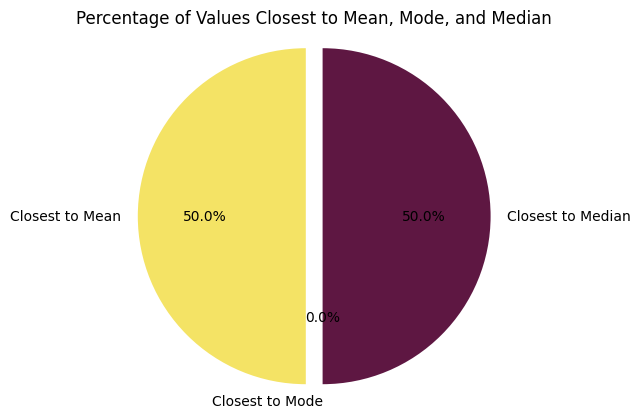

In [ ]:
# calculate the percentage of values that are closest to mean, mode, and median
dataset['closest_to_mean'] = abs(dataset['amount'] - mean) <= abs(dataset['amount'] - mode)
dataset['closest_to_mode'] = dataset['amount'] == mode
dataset['closest_to_median'] = abs(dataset['amount'] - median) <= abs(dataset['amount'] - mode)

# calculate the percentage of values that are closest to mean, mode, and median with respect to all values in the column
percentage_closest_to_mean = round((dataset['closest_to_mean'].sum() / dataset['amount'].count()) * 100, 2)
percentage_closest_to_mode = round((dataset['closest_to_mode'].sum() / dataset['amount'].count()) * 100, 2)
percentage_closest_to_median = round((dataset['closest_to_median'].sum() / dataset['amount'].count()) * 100, 2)

# create a pie chart showing the percentage of values that are closest to mean, mode, and median with respect to all values in the column
labels = ['Closest to Mean', 'Closest to Mode', 'Closest to Median']
sizes = [percentage_closest_to_mean, percentage_closest_to_mode, percentage_closest_to_median]
colors = ['#f4e365', '#e52b50', '#5e1742']
explode = (0.1, 0, 0)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Values Closest to Mean, Mode, and Median')
plt.show()

In [ ]:
#imputing
impute = SimpleImputer(missing_values=np.nan, strategy='median')
impute.fit(dataset[['amount']])
dataset['amount'] = impute.transform(dataset[['amount']])

In [ ]:
#Dropping Null
dataset = dataset.dropna(subset=['isFlaggedFraud'])

In [ ]:
dataset.isnull().sum()

step                 0
type                 0
amount               0
nameOrig             0
oldbalanceOrg        0
newbalanceOrig       0
nameDest             0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
isFlaggedFraud       0
closest_to_mean      0
closest_to_mode      0
closest_to_median    0
dtype: int64

In [ ]:
dataset.shape

(699212, 14)

In [ ]:
object_cols = dataset.select_dtypes(include=['object']).columns
for col in object_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

In [ ]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,closest_to_mean,closest_to_mode,closest_to_median
0,1.0,3,9839.64,83456,170136.0,160296.36,185644,0.0,0.0,0.0,0.0,True,False,True
1,1.0,3,1864.28,240750,21249.0,19384.72,193453,0.0,0.0,0.0,0.0,True,False,True
2,1.0,4,181.00,110023,181.0,0.00,51187,0.0,0.0,1.0,0.0,True,False,True
3,1.0,1,181.00,641382,181.0,0.00,45579,21182.0,0.0,1.0,0.0,True,False,True
4,1.0,3,11668.14,378491,41554.0,29885.86,94618,0.0,0.0,0.0,0.0,True,False,True


In [ ]:
corr = dataset.corr()
corr

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,closest_to_mean,closest_to_mode,closest_to_median
step,1.000000,-0.016675,0.016791,-0.000189,-0.009572,-0.011247,-0.024116,0.007127,-0.009065,0.123555,NaN,-0.010821,0.018633,-0.010783
type,-0.016675,1.000000,0.058045,-0.000598,-0.338409,-0.351442,0.587197,-0.161762,-0.122111,0.021010,NaN,-0.003004,0.002635,-0.003062
amount,0.016791,0.058045,1.000000,0.001843,0.000527,-0.007564,-0.334155,0.208088,0.309561,0.135269,NaN,-0.046007,0.158192,-0.046602
nameOrig,-0.000189,-0.000598,0.001843,1.000000,-0.000185,-0.000146,-0.001375,0.002326,0.002512,0.000683,NaN,0.000473,0.000840,0.000440
oldbalanceOrg,-0.009572,-0.338409,0.000527,-0.000185,1.000000,0.998904,-0.159027,0.092940,0.063670,0.004331,NaN,-0.004564,0.017984,-0.004552
newbalanceOrig,-0.011247,-0.351442,-0.007564,-0.000146,0.998904,1.000000,-0.162306,0.094747,0.063076,-0.010508,NaN,0.000778,0.002729,0.000788
nameDest,-0.024116,0.587197,-0.334155,-0.001375,-0.159027,-0.162306,1.000000,-0.257724,-0.281619,-0.021790,NaN,0.001613,-0.002324,0.001624
oldbalanceDest,0.007127,-0.161762,0.208088,0.002326,0.092940,0.094747,-0.257724,1.000000,0.973044,-0.008620,NaN,0.000813,-0.001757,0.000803
newbalanceDest,-0.009065,-0.122111,0.309561,0.002512,0.063670,0.063076,-0.281619,0.973044,1.000000,-0.001133,NaN,-0.003254,0.007097,-0.003374
isFraud,0.123555,0.021010,0.135269,0.000683,0.004331,-0.010508,-0.021790,-0.008620,-0.001133,1.000000,NaN,-0.052803,0.122350,-0.052779


<Axes: >

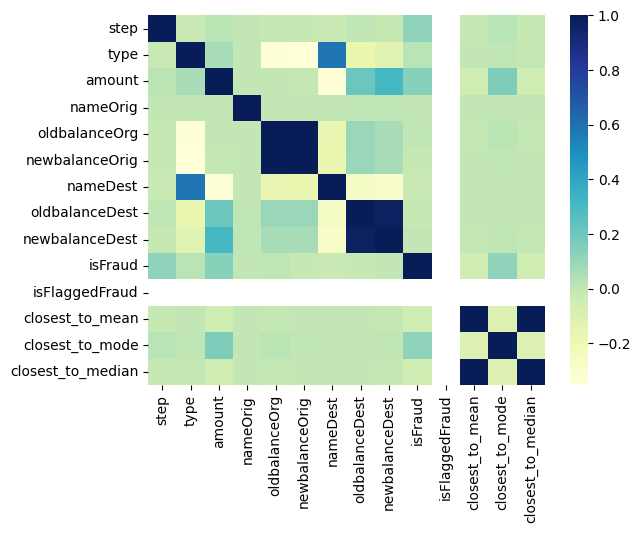

In [ ]:
sns.heatmap(corr, cmap = 'YlGnBu')

In [ ]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,closest_to_mean,closest_to_mode,closest_to_median
0,1.0,3,9839.64,83456,170136.0,160296.36,185644,0.0,0.0,0.0,0.0,True,False,True
1,1.0,3,1864.28,240750,21249.0,19384.72,193453,0.0,0.0,0.0,0.0,True,False,True
2,1.0,4,181.00,110023,181.0,0.00,51187,0.0,0.0,1.0,0.0,True,False,True
3,1.0,1,181.00,641382,181.0,0.00,45579,21182.0,0.0,1.0,0.0,True,False,True
4,1.0,3,11668.14,378491,41554.0,29885.86,94618,0.0,0.0,0.0,0.0,True,False,True


address the class imbalance issue

In [ ]:
train_df = dataset.drop(['isFlaggedFraud','oldbalanceOrg','oldbalanceDest','nameOrig'], axis=1)
smote = SMOTE()
X = train_df.drop('isFraud',axis=1).values
y = train_df['isFraud'].values
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
pd.Series(y_resampled).value_counts()

0.0    698278
1.0    698278
dtype: int64

In [ ]:
legit = dataset[dataset.isFraud==0]
fraud = dataset[dataset.isFraud==1]
print(legit.shape)
print(fraud.shape)

(698278, 14)
(934, 14)


In [ ]:
legit.amount.describe()

count    6.982780e+05
mean     1.626963e+05
std      2.655778e+05
min      1.000000e-01
25%      1.282858e+04
50%      7.802688e+04
75%      2.178125e+05
max      6.419835e+06
Name: amount, dtype: float64

In [ ]:
fraud.amount.describe()

count    9.340000e+02
mean     1.193114e+06
std      2.040301e+06
min      1.190000e+02
25%      8.864910e+04
50%      3.531794e+05
75%      1.218166e+06
max      1.000000e+07
Name: amount, dtype: float64

In [ ]:
dataset.groupby('isFraud').mean()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,closest_to_mean,closest_to_mode,closest_to_median
isFraud,,,,,,,,,,,,,
0.0,18.350091,1.707283,1.626963e+05,349549.596220,8.785070e+05,899175.075471,83941.350310,980461.364172,1.138788e+06,0.0,0.998387,0.000000,0.998386
1.0,47.512848,2.480728,1.193114e+06,353325.066381,1.227728e+06,41503.656124,34576.899358,432750.832099,1.062245e+06,0.0,0.938972,0.014989,0.938972


In [ ]:
legitSample = legit.sample(n=7506)

In [ ]:
newDataset = pd.concat([legitSample, fraud], axis = 0)

In [ ]:
newDataset.head()
newDataset.shape

(8440, 14)

In [ ]:
newDataset.groupby('isFraud').mean()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,closest_to_mean,closest_to_mode,closest_to_median
isFraud,,,,,,,,,,,,,
0.0,18.407807,1.686917,1.600383e+05,348218.904610,9.031338e+05,926527.369353,83747.518252,990893.849980,1.135682e+06,0.0,0.998135,0.000000,0.998135
1.0,47.512848,2.480728,1.193114e+06,353325.066381,1.227728e+06,41503.656124,34576.899358,432750.832099,1.062245e+06,0.0,0.938972,0.014989,0.938972


In [ ]:
corr = newDataset.corr()
corr

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,closest_to_mean,closest_to_mode,closest_to_median
step,1.000000,0.099060,0.324779,0.011111,0.039561,-0.063224,-0.130336,-0.034424,0.005456,0.595459,NaN,-0.177696,0.086812,-0.177696
type,0.099060,1.000000,0.091172,0.003989,-0.299210,-0.345048,0.500630,-0.177870,-0.155821,0.179368,NaN,-0.033630,0.021292,-0.033630
amount,0.324779,0.091172,1.000000,0.012304,0.234488,-0.022336,-0.185538,0.032254,0.204669,0.408809,NaN,-0.708129,0.500063,-0.708129
nameOrig,0.011111,0.003989,0.012304,1.000000,-0.007049,-0.009032,-0.002774,0.023190,0.028380,0.007949,NaN,0.010451,0.007823,0.010451
oldbalanceOrg,0.039561,-0.299210,0.234488,-0.007049,1.000000,0.961969,-0.163797,0.071074,0.076111,0.035522,NaN,-0.199725,0.167433,-0.199725
newbalanceOrig,-0.063224,-0.345048,-0.022336,-0.009032,0.961969,1.000000,-0.146627,0.084912,0.046828,-0.098459,NaN,0.000664,0.027281,0.000664
nameDest,-0.130336,0.500630,-0.185538,-0.002774,-0.163797,-0.146627,1.000000,-0.226486,-0.257261,-0.194545,NaN,0.043150,-0.019229,0.043150
oldbalanceDest,-0.034424,-0.177870,0.032254,0.023190,0.071074,0.084912,-0.226486,1.000000,0.958914,-0.074188,NaN,0.015328,-0.014863,0.015328
newbalanceDest,0.005456,-0.155821,0.204669,0.028380,0.076111,0.046828,-0.257261,0.958914,1.000000,-0.009147,NaN,-0.096688,0.063530,-0.096688
isFraud,0.595459,0.179368,0.408809,0.007949,0.035522,-0.098459,-0.194545,-0.074188,-0.009147,1.000000,NaN,-0.203217,0.115554,-0.203217


<Axes: >

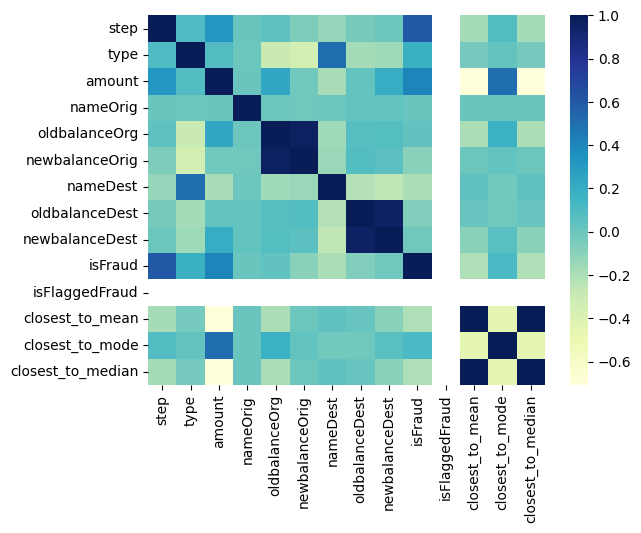

In [ ]:
sns.heatmap(corr, cmap = 'YlGnBu')

In [ ]:
train_df2 = newDataset.drop(['isFlaggedFraud','oldbalanceOrg','oldbalanceDest','nameOrig'], axis=1)

In [ ]:
nX = train_df2.drop("isFraud",axis=1)
ny = train_df2["isFraud"]
X_trainN, X_testN, y_trainN, y_testN = train_test_split(nX, ny, test_size=0.3,stratify=ny,random_state=2)

In [ ]:
print("X_test shape:", X_testN.shape)
print("y_test shape:", y_testN.shape)

X_test shape: (2532, 9)
y_test shape: (2532,)


In [ ]:
print("X_train shape:", X_trainN.shape)
print("y_train shape:", y_trainN.shape)

X_train shape: (5908, 9)
y_train shape: (5908,)


In [ ]:
scaler= StandardScaler()
scaler.fit(X_trainN)
print(scaler.mean_)
X_trainN = scaler.transform(X_trainN)
X_testN = scaler.transform(X_testN)

[2.17070074e+01 1.78334462e+00 2.70787484e+05 8.14921281e+05
 7.85722327e+04 1.14586676e+06 9.92383209e-01 2.03114421e-03
 9.92383209e-01]


KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_trainN, y_trainN)
y_pred = knn.predict(X_testN)

In [ ]:
knn_training = accuracy_score(y_trainN, knn.predict(X_trainN))
knn_test = accuracy_score(y_testN, y_pred)
print(f'Training Accuracy: {knn_training}')
print(f'Testing Accuracy: {knn_test}')

Training Accuracy: 0.9827352742044685
Testing Accuracy: 0.976303317535545


In [ ]:
report = classification_report(y_testN, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_testN, y_pred, pos_label=1)
knn_Precision = precision[1]
knn_Recall = recall[1]
print('Precision:', knn_Precision)
print('Recall:', knn_Recall)

Precision: 0.9365079365079365
Recall: 0.8428571428571429


In [ ]:
knn_cm = confusion_matrix(y_testN, y_pred)
print(knn_cm)

[[2236   16]
 [  44  236]]


<Axes: >

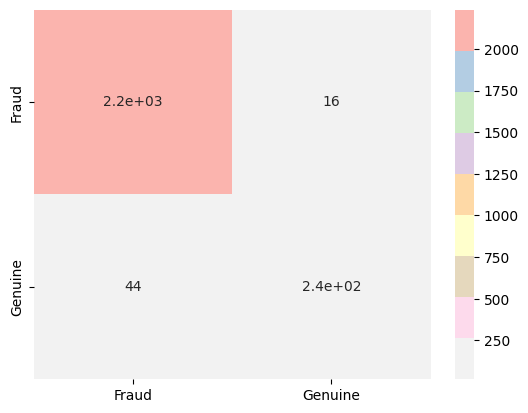

In [ ]:
sns.heatmap(knn_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_trainN,y_trainN)

LogisticRegression(max_iter=1000)

In [ ]:
X_train_prediction = model.predict(X_trainN)
logi_training_data_accuracy = accuracy_score(X_train_prediction, y_trainN)
X_test_prediction = model.predict(X_testN)
logi_test_data_accuracy = accuracy_score(X_test_prediction, y_testN)

In [ ]:
print('Accuracy on Training data : ', logi_training_data_accuracy)
print('Accuracy score on Test Data : ', logi_test_data_accuracy)

Accuracy on Training data :  0.9520988490182803
Accuracy score on Test Data :  0.9518167456556083


In [ ]:
report = classification_report(y_testN, X_test_prediction)
precision, recall, f1, support = precision_recall_fscore_support(y_testN, X_test_prediction, pos_label=1)
logi_Precision = precision[1]
logi_Recall = recall[1]
print('Precision:', logi_Precision)
print('Recall:', logi_Recall)

Precision: 0.9293478260869565
Recall: 0.6107142857142858


In [ ]:
logi_cm = confusion_matrix(y_testN, X_test_prediction)
print(logi_cm)

[[2239   13]
 [ 109  171]]


<Axes: >

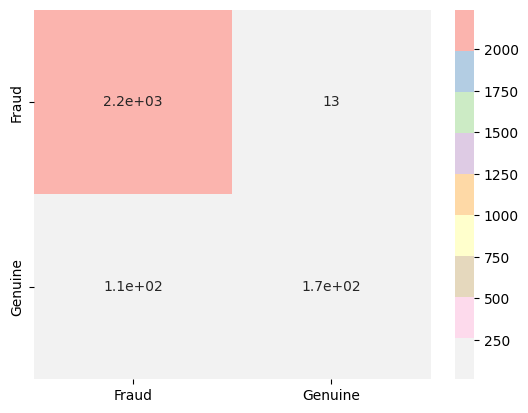

In [ ]:
sns.heatmap(logi_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

Gaussian NB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_trainN, y_trainN)

GaussianNB()

In [ ]:
gnb_training = gnb.score(X_trainN, y_trainN)
gnb_test = gnb.score(X_testN, y_testN)
print("Training accuracy of the model is {:.2f}".format(gnb_training))
print("Testing accuracy of the model is {:.2f}".format(gnb_test))

Training accuracy of the model is 0.93
Testing accuracy of the model is 0.93


In [ ]:
y_pred = gnb.predict(X_testN)
report = classification_report(y_testN, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_testN, y_pred, pos_label=1)
gnb_Precision = precision[1]
gnb_Recall = recall[1]
print('Precision:', gnb_Precision)
print('Recall:', gnb_Recall)

Precision: 0.8904109589041096
Recall: 0.4642857142857143


In [ ]:
predictions = gnb.predict(X_testN)
gnb_cm=confusion_matrix(predictions, y_testN)
print(gnb_cm)

[[2236  150]
 [  16  130]]


<Axes: >

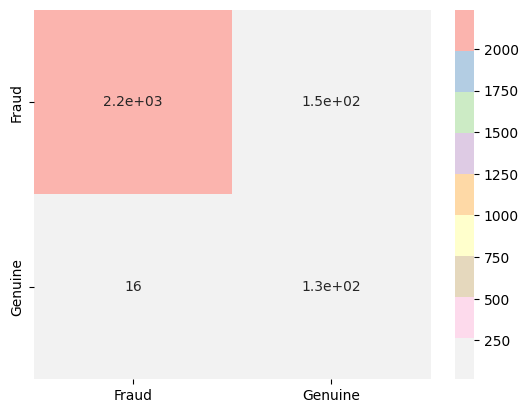

In [ ]:
sns.heatmap(gnb_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

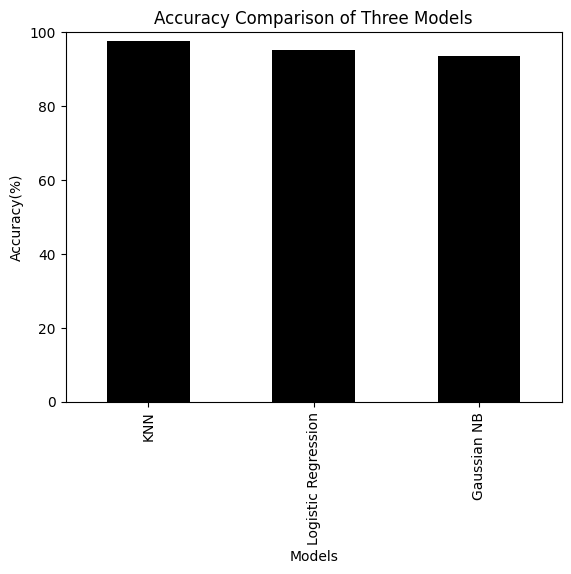

In [ ]:
accuracy = {'Model': ['KNN', 'Logistic Regression', 'Gaussian NB'],
        'Accuracy': [ knn_test*100,  logi_test_data_accuracy*100,  gnb_test*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='black', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Accuracy Comparison of Three Models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy(%)')
plt.show()

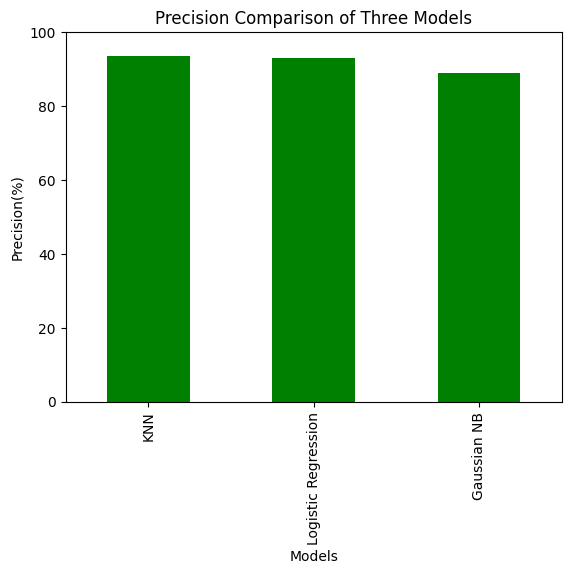

In [ ]:
accuracy = {'Model': ['KNN', 'Logistic Regression', 'Gaussian NB'],
        'Accuracy': [knn_Precision*100, logi_Precision*100, gnb_Precision*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='green', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Precision Comparison of Three Models')
ax.set_xlabel('Models')
ax.set_ylabel('Precision(%)')
plt.show()

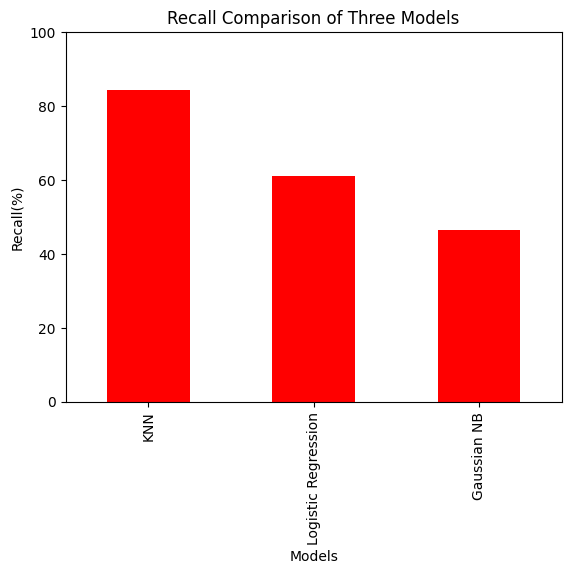

In [ ]:
accuracy = {'Model': ['KNN', 'Logistic Regression', 'Gaussian NB'],
        'Accuracy': [knn_Recall*100, logi_Recall*100, gnb_Recall*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='red', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Recall Comparison of Three Models')
ax.set_xlabel('Models')
ax.set_ylabel('Recall(%)')
plt.show()

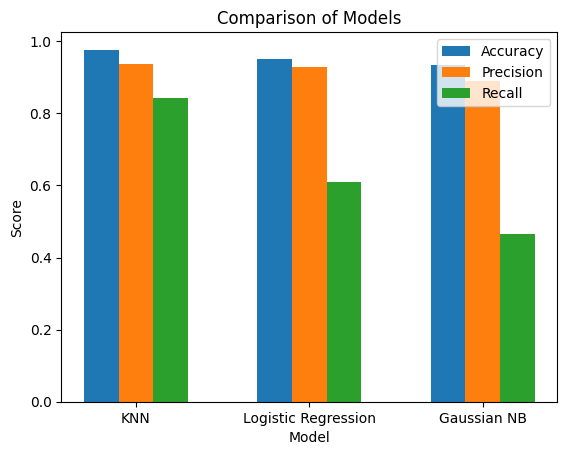

In [ ]:
import matplotlib.pyplot as plt


models = ['KNN', 'Logistic Regression', 'Gaussian NB']
accuracy = [ knn_test,  logi_test_data_accuracy,  gnb_test]
precision = [knn_Precision, logi_Precision,  gnb_Precision]
recall = [ knn_Recall, logi_Recall,  gnb_Recall]


fig, ax = plt.subplots()
ax.bar([x-0.2 for x in range(len(models))], accuracy, width=0.2, label='Accuracy')
ax.bar([x for x in range(len(models))], precision, width=0.2, label='Precision')
ax.bar([x+0.2 for x in range(len(models))], recall, width=0.2, label='Recall')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comparison of Models')
ax.legend()

ax.set_xticks(range(len(models)))
ax.set_xticklabels(models)

plt.show()